# More Denoising Experiments

In [1]:
import sys 
sys.path.append("../")

import torch 
import torch.nn

from Conv1d_NN import Conv1d_NN

from models import * 
from train import * 
from dataset import * 
from pixelshuffle import * 

torch.Size([32, 12, 40])
torch.Size([32, 32, 40])
--------------------------------------------------
Input:  torch.Size([32, 12, 40])
Upsampled:  torch.Size([32, 3, 160])
Downsampled:  torch.Size([32, 12, 40])
Inverse module works.


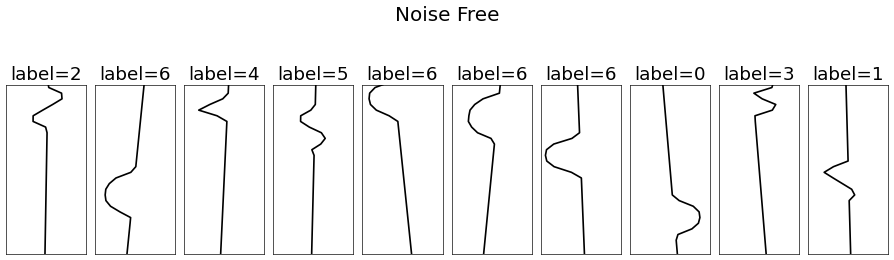

In [2]:
# Clean Data
clean_dataset = MNIST1D_Dataset()
clean_dataset.data_args.iid_noise_scale = 0 
clean_dataset.data_args.corr_noise_scale = 0 

clean_data = clean_dataset.make_dataset()

Plot = MNIST1D_Plot()
Plot.plot_signals(clean_data['x'][:10], clean_data['t'],labels = clean_data['y'][:10], zoom = 5, title='Noise Free') 

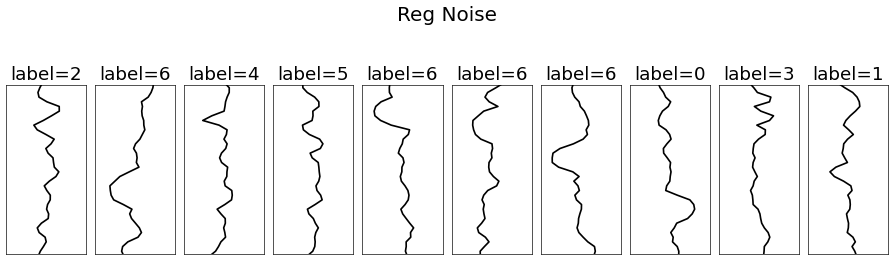

In [3]:
# Reg settings Data
reg_dataset = MNIST1D_Dataset()
reg_data = reg_dataset.make_dataset()
Plot = MNIST1D_Plot()
Plot.plot_signals(reg_data['x'][:10], reg_data['t'],labels = reg_data['y'][:10], zoom = 5, title='Reg Noise') 


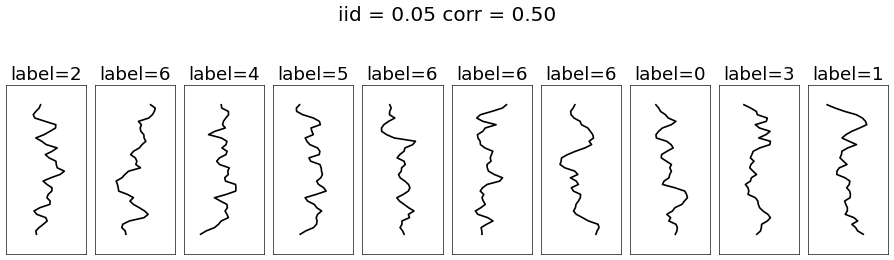

In [4]:
# iid = 0.05 corr = 0.50 
noisy1_dataset = MNIST1D_Dataset()
noisy1_dataset.data_args.iid_noise_scale = 0.05
noisy1_dataset.data_args.corr_noise_scale = 0.5

noisy1_data = noisy1_dataset.make_dataset()

Plot = MNIST1D_Plot()
Plot.plot_signals(noisy1_data['x'][:10], noisy1_data['t'],labels = noisy1_data['y'][:10], zoom = 5, title='iid = 0.05 corr = 0.50') 

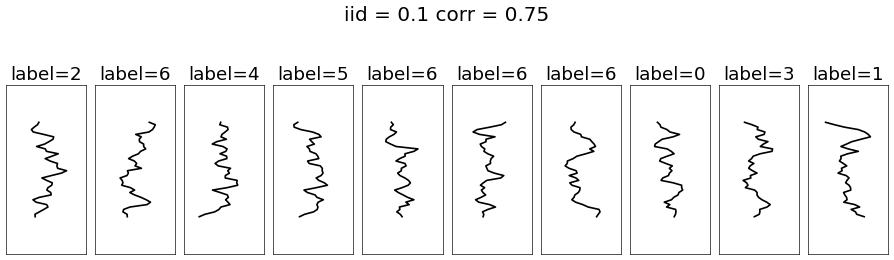

In [5]:
# iid = 0.1 corr = 0.75
noisy2_dataset = MNIST1D_Dataset()
noisy2_dataset.data_args.iid_noise_scale = 0.1
noisy2_dataset.data_args.corr_noise_scale = 0.75

noisy2_data = noisy2_dataset.make_dataset()

Plot = MNIST1D_Plot()
Plot.plot_signals(noisy2_data['x'][:10], noisy2_data['t'],labels = noisy2_data['y'][:10], zoom = 5, title='iid = 0.1 corr = 0.75') 

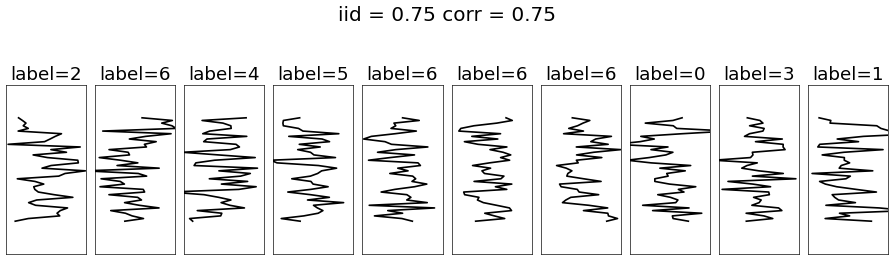

In [10]:
# iid = 0.75 corr = 0.75
noisy3_dataset = MNIST1D_Dataset()
noisy3_dataset.data_args.iid_noise_scale = 0.75
noisy3_dataset.data_args.corr_noise_scale = 0.75

noisy3_data = noisy3_dataset.make_dataset()

Plot = MNIST1D_Plot()
Plot.plot_signals(noisy3_data['x'][:10], noisy3_data['t'],labels = noisy3_data['y'][:10], zoom = 2, title='iid = 0.75 corr = 0.75') 

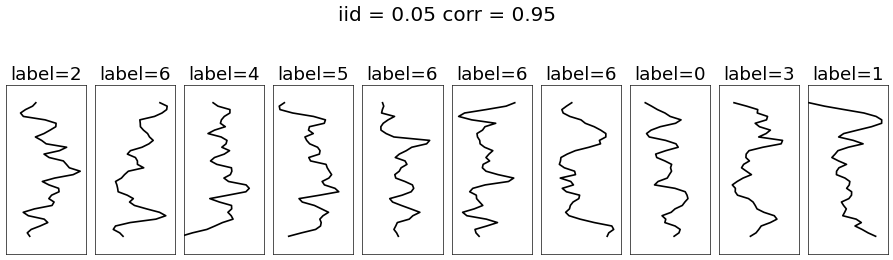

In [12]:
# iid = 0.05 corr = 0.95
noisy4_dataset = MNIST1D_Dataset()
noisy4_dataset.data_args.iid_noise_scale = 0.05
noisy4_dataset.data_args.corr_noise_scale = 0.95

noisy4_data = noisy4_dataset.make_dataset()

Plot = MNIST1D_Plot()
Plot.plot_signals(noisy4_data['x'][:10], noisy4_data['t'],labels = noisy4_data['y'][:10], zoom = 3, title='iid = 0.05 corr = 0.95') 

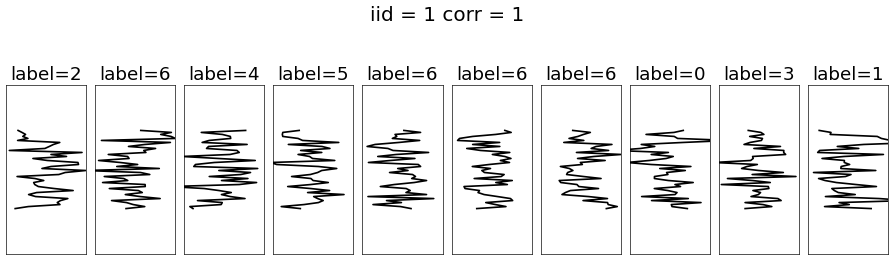

In [13]:
# iid = 1 corr = 1
noisy5_dataset = MNIST1D_Dataset()
noisy5_dataset.data_args.iid_noise_scale = 1
noisy5_dataset.data_args.corr_noise_scale = 1

noisy5_data = noisy5_dataset.make_dataset()

Plot = MNIST1D_Plot()
Plot.plot_signals(noisy5_data['x'][:10], noisy5_data['t'],labels = noisy5_data['y'][:10], zoom = 2, title='iid = 1 corr = 1') 

# Testing

### Regular Noise

In [38]:
# Reg : iid = 0.02 corr = 0.25
reg_model = Conv1d_NN_Denoiser

print("Results for Reg Noise : iid = 0.02 corr = 0.25") 
reg_results = train_model_denoise(reg_data, clean_data, reg_model, reg_dataset.model_args)
print() 


Results for Reg Noise : iid = 0.02 corr = 0.25
step 1000, dt 37.34s, train_loss 1.867e-01, test_loss 1.842e-01, train_acc 7.5, test_acc 7.3
step 2000, dt 41.06s, train_loss 1.728e-01, test_loss 1.723e-01, train_acc 7.7, test_acc 7.6
step 3000, dt 41.53s, train_loss 1.723e-01, test_loss 1.682e-01, train_acc 7.9, test_acc 7.7
step 4000, dt 39.51s, train_loss 1.679e-01, test_loss 1.676e-01, train_acc 7.9, test_acc 7.8
step 5000, dt 39.54s, train_loss 1.669e-01, test_loss 1.664e-01, train_acc 8.0, test_acc 7.8
step 6000, dt 40.20s, train_loss 1.611e-01, test_loss 1.643e-01, train_acc 8.1, test_acc 7.8



Original Input


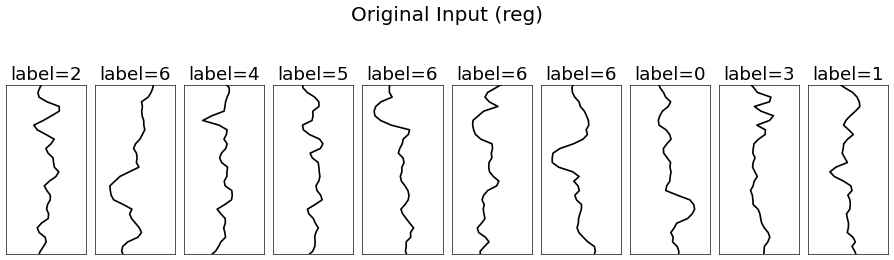

Target Output


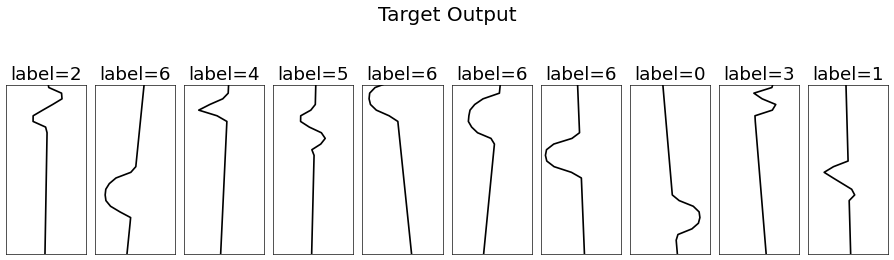

Prediction


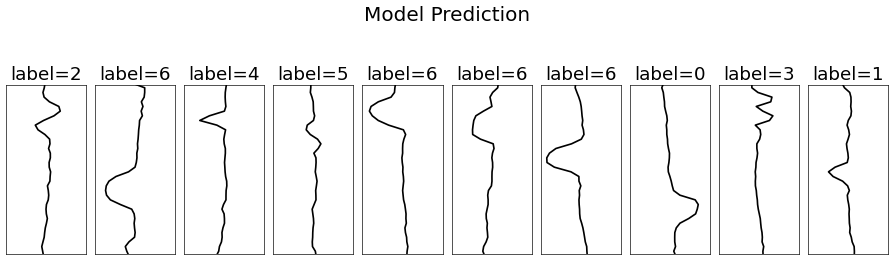

In [40]:
reg_sample = reg_data['x'][:10].to('mps')

reg_model = reg_model.to('mps')

reg_output = reg_model(reg_sample)
reg_output = reg_output.detach().cpu().numpy()

# Original Input 
print("Original Input")
Plot.plot_signals(reg_data['x'][:10], reg_data['t'], labels=reg_data['y'][:10], zoom = 5, title='Original Input (reg)')

# Target 
print("Target Output")
Plot.plot_signals(clean_data['x'][:10], clean_data['t'], labels=clean_data['y'][:10], zoom = 5, title='Target Output')

# Model Prediction
print("Prediction")
Plot.plot_signals(reg_output, reg_data['t'], labels=reg_data['y'][:10], zoom = 5, title='Model Prediction')

### iid = 0.05 corr = 0.50

In [13]:
# Noisy 1 : iid = 0.05 corr = 0.50
noisy1_model = Conv1d_NN_Denoiser

print("Noisy 1 Results : iid = 0.05 corr = 0.50") 
noisy1_results = train_model_denoise(noisy1_data, clean_data, noisy1_model, noisy1_dataset.model_args)
print() 

Noisy 1 Results : iid = 0.05 corr = 0.50
step 1000, dt 38.46s, train_loss 4.421e-01, test_loss 4.637e-01, train_acc 3.5, test_acc 3.3
step 2000, dt 38.44s, train_loss 4.473e-01, test_loss 4.615e-01, train_acc 3.6, test_acc 3.4
step 3000, dt 37.38s, train_loss 4.384e-01, test_loss 4.645e-01, train_acc 3.6, test_acc 3.3
step 4000, dt 37.97s, train_loss 4.491e-01, test_loss 4.678e-01, train_acc 3.6, test_acc 3.3
step 5000, dt 38.46s, train_loss 4.456e-01, test_loss 4.730e-01, train_acc 3.6, test_acc 3.3
step 6000, dt 38.45s, train_loss 4.407e-01, test_loss 4.653e-01, train_acc 3.6, test_acc 3.3



Original Input


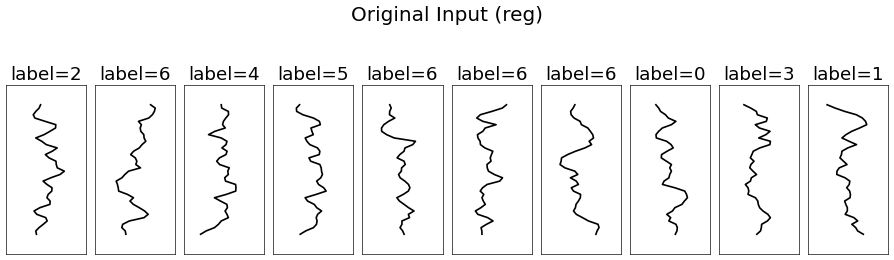

Target Output


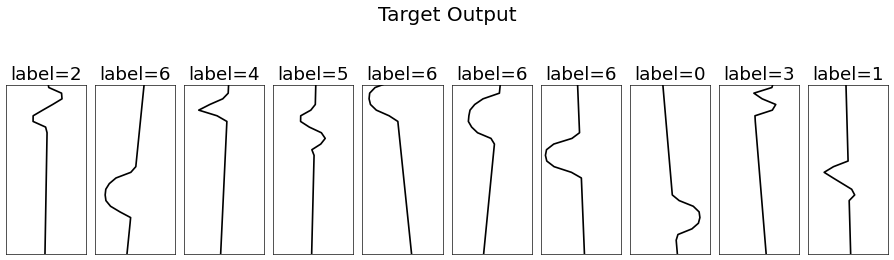

Prediction


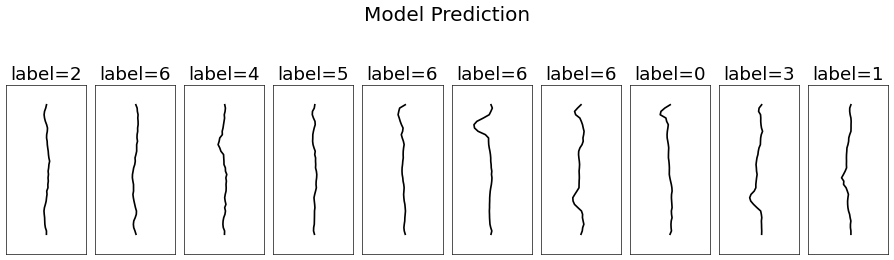

In [29]:
noisy1_sample = noisy1_data['x'][:10].to('mps')

noisy1_model = noisy1_model.to('mps')

noisy1_output = noisy1_model(noisy1_sample)
noisy1_output = noisy1_output.detach().cpu().numpy()

# Original Input 
print("Original Input")
Plot.plot_signals(noisy1_data['x'][:10], noisy1_data['t'], labels=noisy1_data['y'][:10], zoom = 5, title='Original Input (reg)')

# Target 
print("Target Output")
Plot.plot_signals(clean_data['x'][:10], clean_data['t'], labels=clean_data['y'][:10], zoom = 5, title='Target Output')

# Model Prediction
print("Prediction")
Plot.plot_signals(noisy1_output, noisy1_data['t'], labels=noisy1_data['y'][:10], zoom = 5, title='Model Prediction')

### iid = 0.01 corr = 0.75

In [14]:
# Noisy 2 : iid = 0.1 corr = 0.75
noisy2_model = Conv1d_NN_Denoiser

print("Noisy 2 Results : iid = 0.1 corr = 0.75") 
noisy2_results = train_model_denoise(noisy2_data, clean_data, noisy2_model, noisy2_dataset.model_args)
print() 


Noisy 2 Results : iid = 0.1 corr = 0.75
step 1000, dt 38.83s, train_loss 6.868e-01, test_loss 6.862e-01, train_acc 1.8, test_acc 1.6
step 2000, dt 38.14s, train_loss 6.935e-01, test_loss 6.876e-01, train_acc 1.8, test_acc 1.6
step 3000, dt 38.06s, train_loss 6.917e-01, test_loss 6.920e-01, train_acc 1.8, test_acc 1.6
step 4000, dt 33.39s, train_loss 7.013e-01, test_loss 6.899e-01, train_acc 1.9, test_acc 1.6
step 5000, dt 32.15s, train_loss 6.775e-01, test_loss 6.883e-01, train_acc 1.9, test_acc 1.6
step 6000, dt 32.53s, train_loss 6.834e-01, test_loss 6.877e-01, train_acc 1.9, test_acc 1.6



Original Input


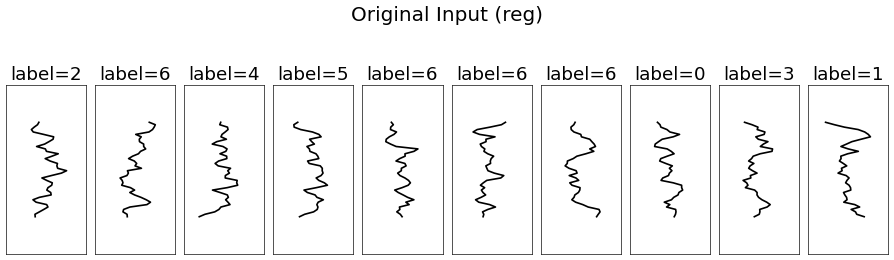

Target Output


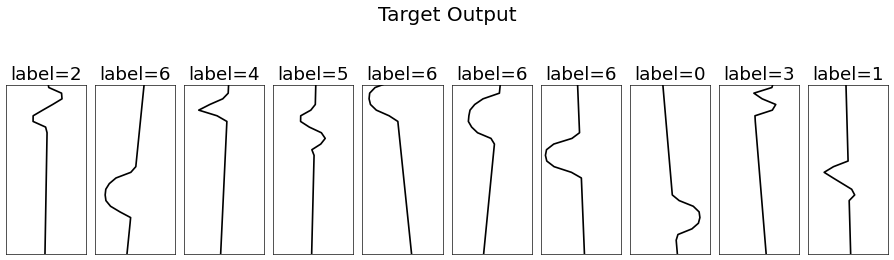

Prediction


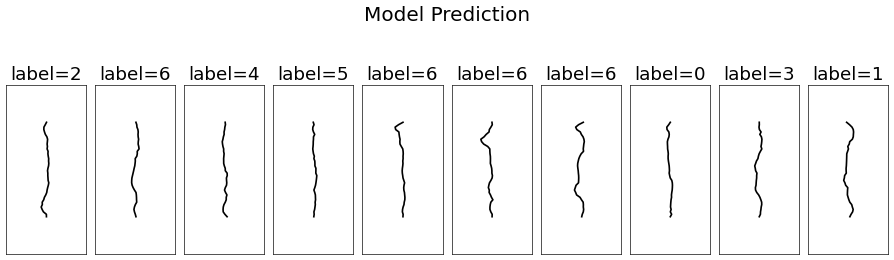

In [30]:
noisy2_sample = noisy2_data['x'][:10].to('mps')

noisy2_model = noisy2_model.to('mps')

noisy2_output = noisy2_model(noisy2_sample)
noisy2_output = noisy2_output.detach().cpu().numpy()

# Original Input 
print("Original Input")
Plot.plot_signals(noisy2_data['x'][:10], noisy2_data['t'], labels=noisy2_data['y'][:10], zoom = 5, title='Original Input (reg)')

# Target 
print("Target Output")
Plot.plot_signals(clean_data['x'][:10], clean_data['t'], labels=clean_data['y'][:10], zoom = 5, title='Target Output')

# Model Prediction
print("Prediction")
Plot.plot_signals(noisy2_output, noisy2_data['t'], labels=noisy2_data['y'][:10], zoom = 5, title='Model Prediction')

### iid = 0.75 corr = 0.75

In [15]:
# Noisy 3 : iid = 0.75 corr = 0.75
noisy3_model = Conv1d_NN_Denoiser

print("Noisy 3 Results : iid = 0.75 corr = 0.50") 
noisy3_results = train_model_denoise(noisy3_data, clean_data, noisy3_model, noisy3_dataset.model_args)
print() 


Noisy 3 Results : iid = 0.75 corr = 0.50
step 1000, dt 35.94s, train_loss 9.636e-01, test_loss 9.248e-01, train_acc 0.4, test_acc 0.3
step 2000, dt 37.17s, train_loss 9.581e-01, test_loss 9.244e-01, train_acc 0.5, test_acc 0.3
step 3000, dt 36.39s, train_loss 9.563e-01, test_loss 9.267e-01, train_acc 0.5, test_acc 0.3
step 4000, dt 33.83s, train_loss 9.509e-01, test_loss 9.311e-01, train_acc 0.5, test_acc 0.3
step 5000, dt 36.76s, train_loss 9.464e-01, test_loss 9.299e-01, train_acc 0.5, test_acc 0.3
step 6000, dt 35.42s, train_loss 9.535e-01, test_loss 9.305e-01, train_acc 0.5, test_acc 0.3



Original Input


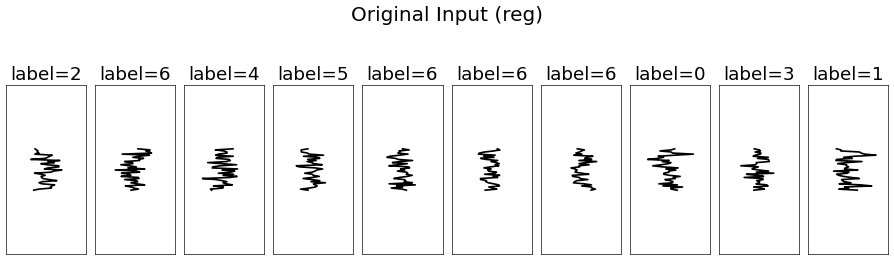

Target Output


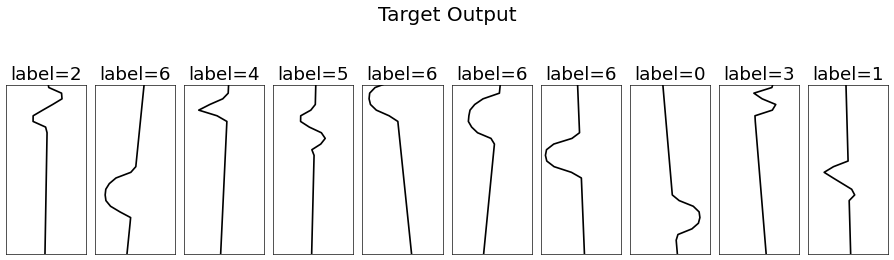

Prediction


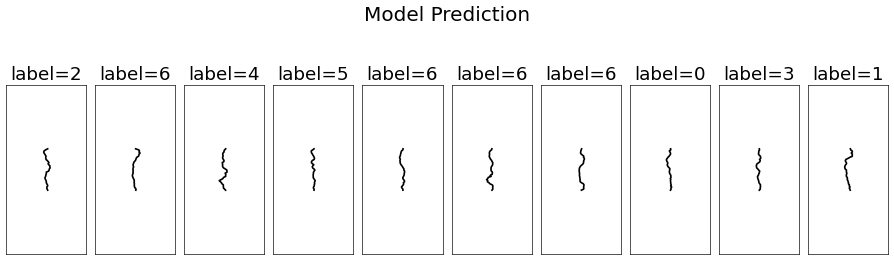

In [31]:
noisy3_sample = noisy3_data['x'][:10].to('mps')

noisy3_model = noisy3_model.to('mps')

noisy3_output = noisy3_model(noisy3_sample)
noisy3_output = noisy3_output.detach().cpu().numpy()

# Original Input 
print("Original Input")
Plot.plot_signals(noisy3_data['x'][:10], noisy3_data['t'], labels=noisy3_data['y'][:10], zoom = 5, title='Original Input (reg)')

# Target 
print("Target Output")
Plot.plot_signals(clean_data['x'][:10], clean_data['t'], labels=clean_data['y'][:10], zoom = 5, title='Target Output')

# Model Prediction
print("Prediction")
Plot.plot_signals(noisy3_output, noisy3_data['t'], labels=noisy3_data['y'][:10], zoom = 5, title='Model Prediction')

### iid = 0.05 corr = 0.95 

In [16]:
# Noisy 4 : iid = 0.05 corr = 0.95
noisy4_model = Conv1d_NN_Denoiser

print("Noisy 4 Results : iid = 0.05 corr = 0.50") 
noisy4_results = train_model_denoise(noisy4_data, clean_data, noisy4_model, noisy4_dataset.model_args)
print() 


Noisy 4 Results : iid = 0.05 corr = 0.50
step 1000, dt 37.30s, train_loss 5.969e-01, test_loss 5.955e-01, train_acc 2.5, test_acc 2.3
step 2000, dt 36.90s, train_loss 5.926e-01, test_loss 5.897e-01, train_acc 2.5, test_acc 2.3
step 3000, dt 29.78s, train_loss 6.009e-01, test_loss 5.767e-01, train_acc 2.6, test_acc 2.4
step 4000, dt 33.43s, train_loss 5.918e-01, test_loss 5.773e-01, train_acc 2.6, test_acc 2.4
step 5000, dt 33.92s, train_loss 5.849e-01, test_loss 5.830e-01, train_acc 2.6, test_acc 2.3
step 6000, dt 35.38s, train_loss 5.789e-01, test_loss 5.725e-01, train_acc 2.7, test_acc 2.4



Original Input


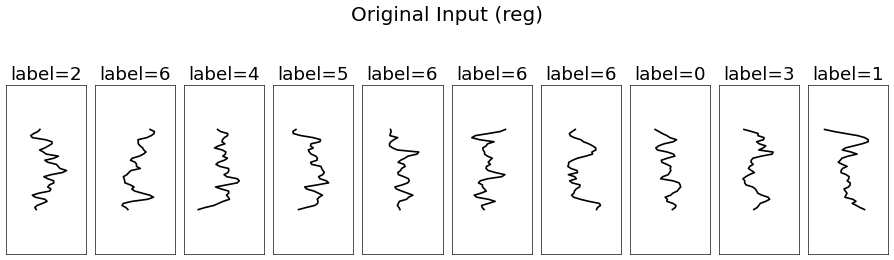

Target Output


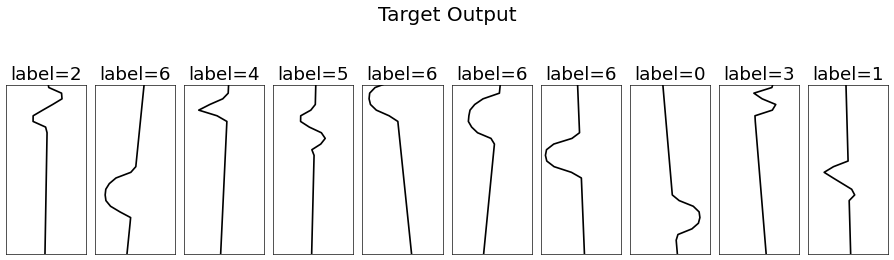

Prediction


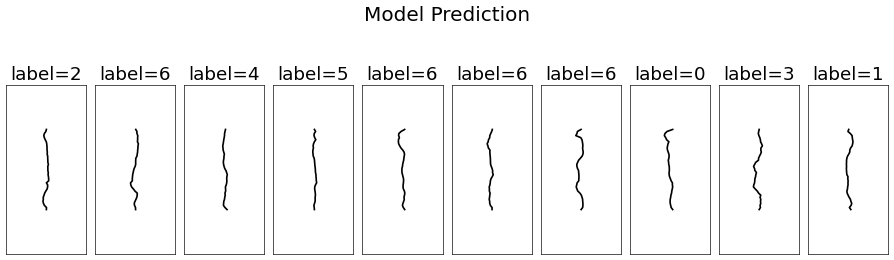

In [33]:
noisy4_sample = noisy4_data['x'][:10].to('mps')

noisy4_model = noisy4_model.to('mps')

noisy4_output = noisy4_model(noisy4_sample)
noisy4_output = noisy4_output.detach().cpu().numpy()

# Original Input 
print("Original Input")
Plot.plot_signals(noisy4_data['x'][:10], noisy4_data['t'], labels=noisy4_data['y'][:10], zoom = 5, title='Original Input (reg)')

# Target 
print("Target Output")
Plot.plot_signals(clean_data['x'][:10], clean_data['t'], labels=clean_data['y'][:10], zoom = 5, title='Target Output')

# Model Prediction
print("Prediction")
Plot.plot_signals(noisy4_output, noisy4_data['t'], labels=noisy4_data['y'][:10], zoom = 5, title='Model Prediction')

### iid = 1 corr = 1

In [17]:
# Noisy 5 : iid = 1 corr = 1
noisy5_model = Conv1d_NN_Denoiser

print("Noisy 5 Results : iid = 0.05 corr = 0.50") 
noisy5_results = train_model_denoise(noisy5_data, clean_data, noisy5_model, noisy5_dataset.model_args)
print() 

Noisy 5 Results : iid = 0.05 corr = 0.50
step 1000, dt 37.56s, train_loss 1.006e+00, test_loss 9.605e-01, train_acc 0.3, test_acc 0.2
step 2000, dt 36.54s, train_loss 1.003e+00, test_loss 9.604e-01, train_acc 0.3, test_acc 0.2
step 3000, dt 35.81s, train_loss 1.007e+00, test_loss 9.610e-01, train_acc 0.3, test_acc 0.2
step 4000, dt 32.28s, train_loss 1.007e+00, test_loss 9.672e-01, train_acc 0.3, test_acc 0.1
step 5000, dt 31.95s, train_loss 9.948e-01, test_loss 9.687e-01, train_acc 0.3, test_acc 0.1
step 6000, dt 31.92s, train_loss 9.949e-01, test_loss 9.740e-01, train_acc 0.3, test_acc 0.1



Original Input


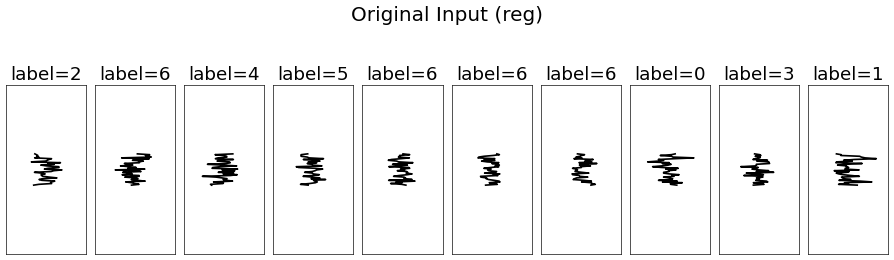

Target Output


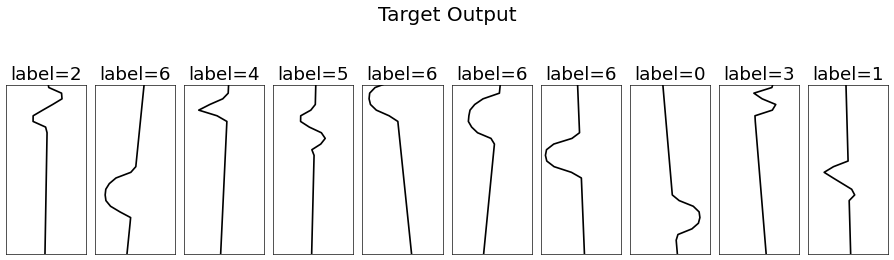

Prediction


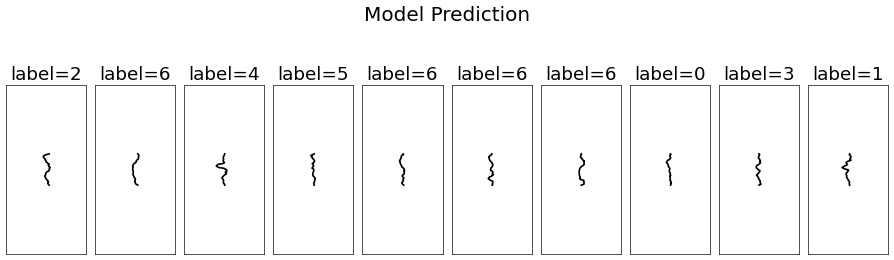

In [35]:
noisy5_sample = noisy5_data['x'][:10].to('mps')

noisy5_model = noisy5_model.to('mps')

noisy5_output = noisy5_model(noisy5_sample)
noisy5_output = noisy5_output.detach().cpu().numpy()

# Original Input 
print("Original Input")
Plot.plot_signals(noisy5_data['x'][:10], noisy5_data['t'], labels=noisy5_data['y'][:10], zoom = 5, title='Original Input (reg)')

# Target 
print("Target Output")
Plot.plot_signals(clean_data['x'][:10], clean_data['t'], labels=clean_data['y'][:10], zoom = 5, title='Target Output')

# Model Prediction
print("Prediction")
Plot.plot_signals(noisy5_output, noisy5_data['t'], labels=noisy5_data['y'][:10], zoom = 5, title='Model Prediction')